# **\[GML\]** Chap1: 시작하기 - Graph metrics

신록예찬  
2023-02-10

# imports

In [56]:
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

In [57]:
# draw a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G)

    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

# 대역적 지표

`-` 전체 네트워크의 측정값을 표현함

## 통합측정지표

`-` 노드가 서로 상호 연결되는 경향을 측정

### 최단경로, 최단경로길이

`-` setup

In [58]:
G = nx.Graph()
V = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Seoul'}
G.add_nodes_from(V.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [59]:
G.nodes

In [60]:
G.edges

{1: 'Dublin', 2: 'Paris', 3: 'Milan', 4: 'Rome', 5: 'Naples', 6: 'Moscow', 7: 'Seoul'}

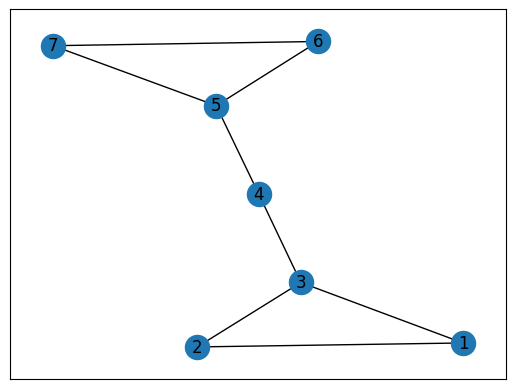

In [61]:
nx.draw_networkx(G)
print(V)

`-` shortest path

In [34]:
path = nx.shortest_path(G,source=1,target=7)
path

In [35]:
path = nx.shortest_path(G,source=1,target=4)
path

In [36]:
path = nx.shortest_path(G,source=4,target=6)
path

`-` shortest path lenghth

최단경로길이는 아래와 같이 구할수 있음

In [37]:
path = nx.shortest_path(G,source=1,target=7)
len(path)

### 특성경로길이 (= 평균최단경로길이)

`-` characteristic path length = average of shortest path lenght

가능한 모든 노드 쌍 사이의 모든 최단경로 길이의 평균으로 정의한다.

$$\text{characteristic path length}=\frac{1}{|V|(|V|-1)}\sum_{i \in V} l_i$$

여기에서 $l_i$는 노드 $i$와 다른 모든 노드사이의 평균경로 길이로
정의한다. 특성경로길이가 더 짧은 네트워크는 정보를 더 빠르게 전송할 수
있다고 해석할 수 있다.

In [38]:
G1 = nx.Graph()
G2 = nx.Graph()
V = {1,2,3,4}
E1 = [(1,2),(2,3),(3,4),(4,1)]
E2 = [(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]
G1.add_nodes_from(V)
G2.add_nodes_from(V)
G1.add_edges_from(E1)
G2.add_edges_from(E2)

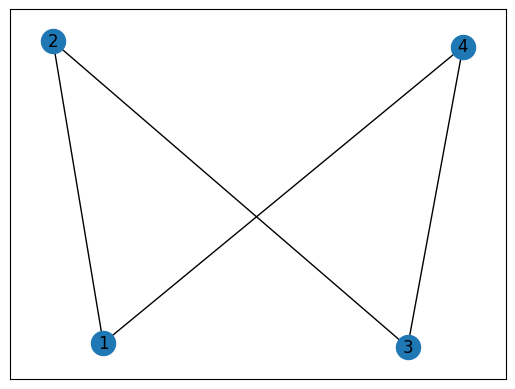

In [39]:
nx.draw_networkx(G1)

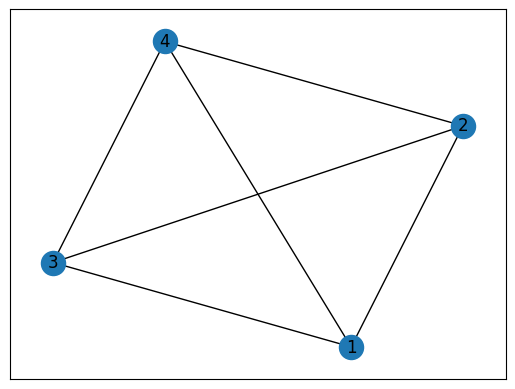

In [40]:
nx.draw_networkx(G2)

`-` 두 그래프 ${\cal G}_1$[1]와 ${\cal G}_2$[2]의 특성경로길이를 각각
계산하면 아래와 같다.

[1] <a href="#fig-2" class="quarto-xref">Figure 2</a>

[2] <a href="#fig-3" class="quarto-xref">Figure 3</a>

In [41]:
nx.average_shortest_path_length(G1)

In [94]:
nx.average_shortest_path_length(G2)

### 대역효율성

모든 노드 쌍에 대한 역최단경로 (inverse shortest path) 길의의 평균을
의미이다. <a href="#fig-2" class="quarto-xref">Figure 2</a>,
<a href="#fig-3" class="quarto-xref">Figure 3</a> 의 그래프에서 이 값을
계산하면 아래와 같다.

`-` 예제1

대역효율성: 0.8333333333333334

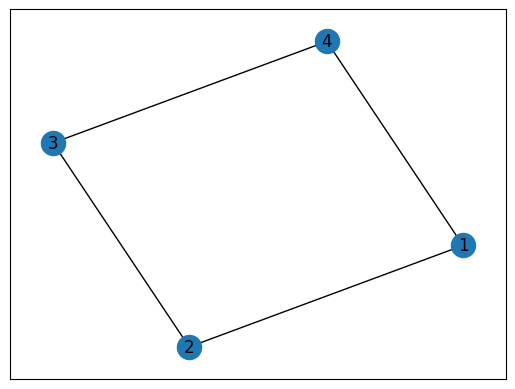

In [42]:
nx.draw_networkx(G1)
print("대역효율성:", nx.global_efficiency(G1))

`-` 예제2

대역효율성: 1.0

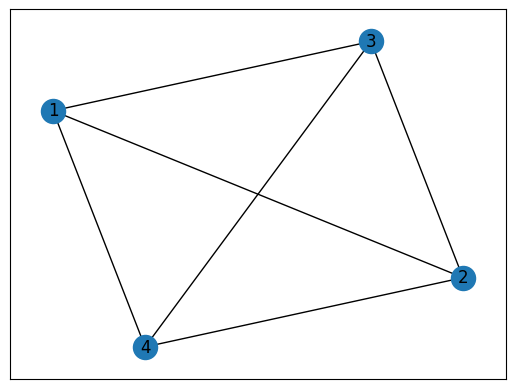

In [47]:
nx.draw_networkx(G2)
print("대역효율성:",nx.global_efficiency(G2))

`-` 예제3

In [45]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

print(nx.global_efficiency(G))
print(nx.local_efficiency(G))

0.611111111111111
0.6666666666666667

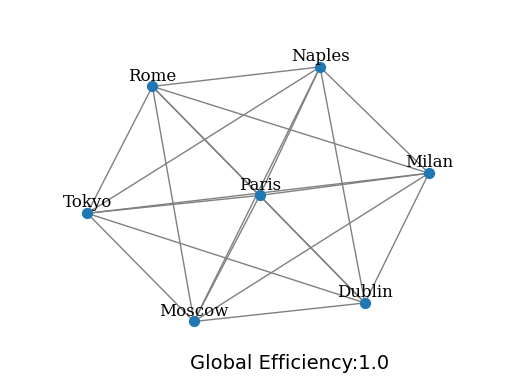

In [8]:
# higher efficiency
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes,filename='efficiency.png')

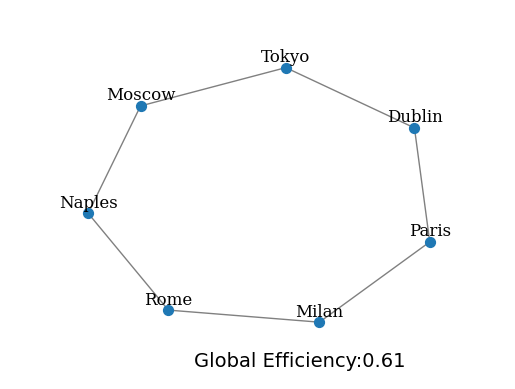

In [9]:
# lower efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes,filename='less_efficiency.png')

### Clustering coefficient

In [10]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [11]:
nx.average_clustering(G)

In [12]:
nx.clustering(G)

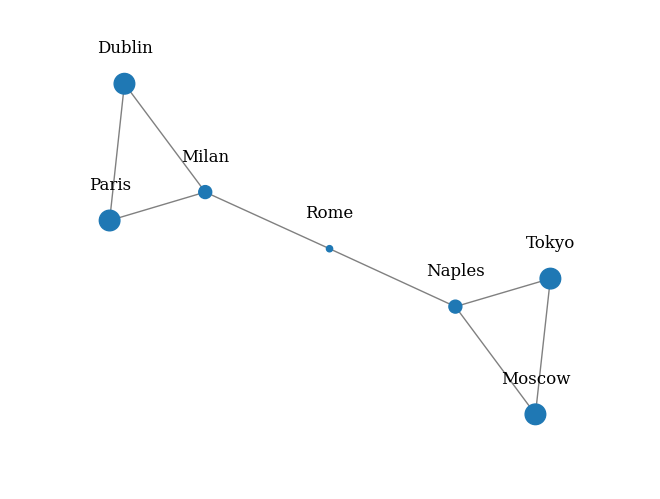

In [13]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clustering.png')

### Centrality

In [14]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [15]:
nx.degree_centrality(G)

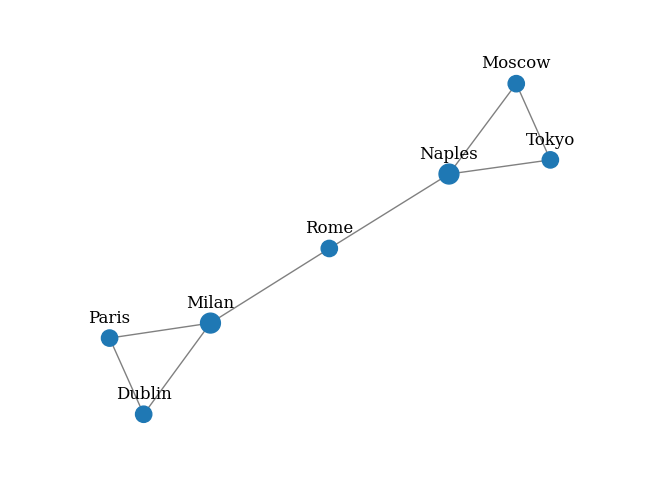

In [16]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

In [17]:
nx.closeness_centrality(G)

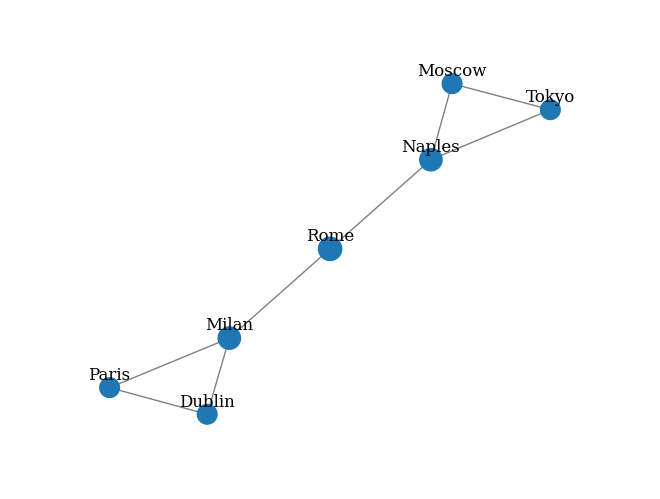

In [18]:
dc = nx.closeness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodes.values()
df

In [19]:
nx.betweenness_centrality(G)

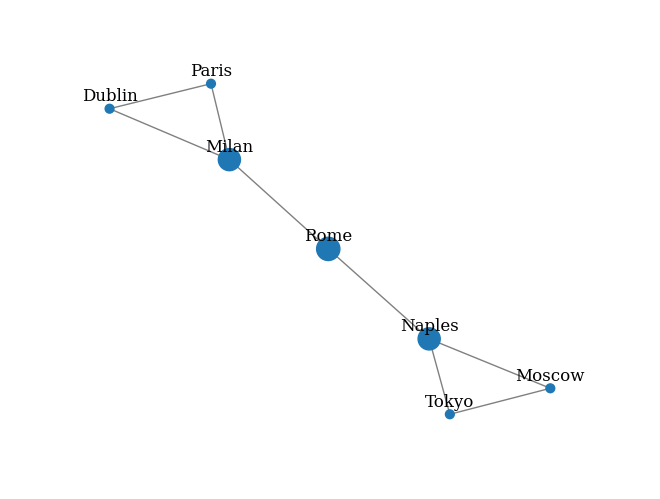

In [20]:
dc = nx.betweenness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodes.values()
df

### Assortativity

In [21]:
nx.degree_pearson_correlation_coefficient(G)

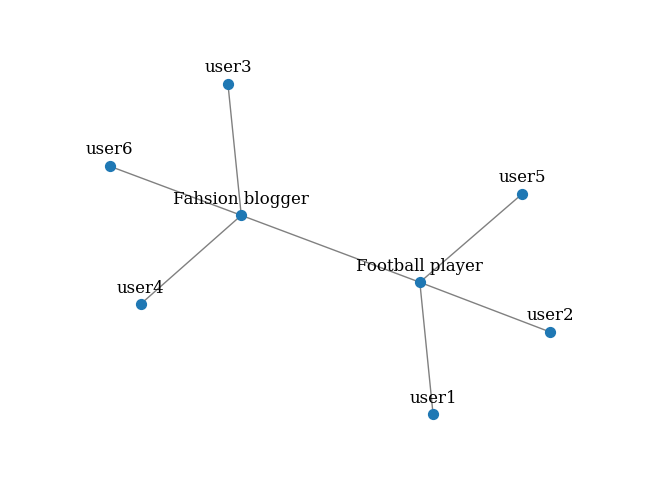

In [22]:
G = nx.Graph()
nodes = {1:'user1', 2:'user2', 3:'Football player', 4:'Fahsion blogger', 5:'user3', 6:'user4',
         7:'user5', 8:'user6'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,3),(2,3),(7,3),(3,4),(5,4),(6,4),(8,4)])

draw_graph(G, node_names=nodes,filename='assortativity.png')

In [23]:
nx.degree_pearson_correlation_coefficient(G)

### Modularity

In [24]:
import networkx.algorithms.community as nx_comm

G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

# partitions can be provided manually
print(nx_comm.modularity(G, communities=[{1,2,3,4},{5,6,7}]))

# or automatically computed using networkx
print(nx_comm.modularity(G, nx_comm.label_propagation_communities(G)))

0.3671875
0.3671875

### Transitivity

In [25]:
nx.transitivity(G)